In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

3


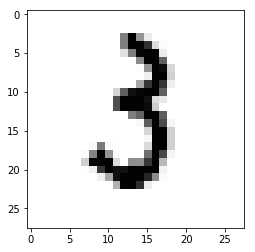

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
image_index = 1234 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs = 2)

Epoch 1/2
60000/60000 [==============================] - 32s 527us/step - loss: 0.0874 - acc: 0.9740
Epoch 2/2
60000/60000 [==============================] - 32s 531us/step - loss: 0.0558 - acc: 0.9823


In [9]:
print("accuracy = ",model.evaluate(x_test, y_test)[1])

10000/10000 [==============================] - 1s 122us/step
accuracy =  0.9838


My prediction is : 0


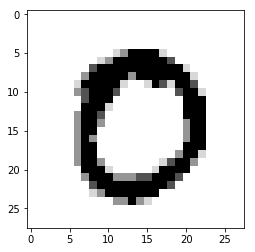

In [10]:
image_index = 3445
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print("My prediction is :",pred.argmax())